# 2 Dimensional Continuous Wavelet Transform and Edge Detection
We define two wavelet functions $\psi^1(x,y)$ and $\psi^2(x,y)$ such that
$$
\psi^1(x,y) = \frac{\partial\theta(x,y)}{\partial x} \quad \text{and} \quad \psi^2(x,y) = \frac{\partial\theta(x,y)}{\partial y}.
$$
Let $\psi^1_s(x,y) = \frac{1}{s^2}\psi^1(\frac{x}{s},\frac{y}{s})$ and $\psi^2_s(x,y) = \frac{1}{s^2}\psi^2(\frac{x}{s},\frac{y}{s})$.
The wavelet transform at scale $s$ can be defined by
$$W_s^1f(x,y) = f*\psi^1_s(x,y) \quad \text{and} \quad W_s^2f(x,y) = f*\psi^2_s(x,y).$$
Then we can have the total derivative of point $(x,y)$ at scale $s$,
\begin{align*}
(W_s^1f(x,y), W_s^2f(x,y)) &= s(\frac{\partial}{\partial x}(f*\theta_s)(x,y), \frac{\partial}{\partial y}(f*\theta_s)(x,y)) \\
&= s\nabla(f*\theta_s)(x,y).
\end{align*}
For point $(x,y)$ at scale $s$, the modulus of the gradient vector is proportional to
$$
	M_s f(x,y) = \sqrt{|W_s^1f(x,y)|^2 + |W_s^2f(x,y)|^2}.
$$
The angle of gradient vector with horizontal direction is
$$
	A_s f(x,y) = \mathrm{arg}(W_s^1f(x,y) + \mathrm{i}W_s^2f(x,y)).
$$
Then we can test whether point $(x,y)$ is the modulu maximum point along the gradient vector.

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
from scipy import signal

In [151]:
def gaus(N, sigma, scale):
    t = np.linspace(-5,5,N)
    g = 1/np.sqrt(scale) * 1 / (sigma * np.sqrt(2*np.pi)) * np.exp(-1/2 * ((-1*t/scale)/sigma)**2)
#     g = g / np.sqrt(np.sum(g*g))
    return g, t

def gaus1(N, sigma, scale):
    t = np.linspace(-5,5,N)
    g = -1 * 1/np.sqrt(scale) * 1/(sigma**3*np.sqrt(2*np.pi)) * (-1*t/scale) * np.exp(-1/2 * (-1*(t/scale)/sigma)**2)
    return g, t

## Test Image

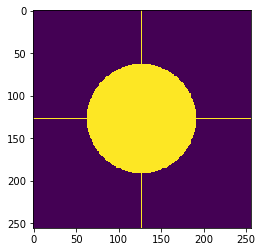

In [152]:
def make_circle():
    x = np.linspace(-127,128,256)
    y = np.linspace(-127,128,256)
    X, Y = np.meshgrid(x,y)
    C = np.zeros([256,256])
    for i in range(256):
        for j in range(256):
            xx = X[i,j]
            yy = Y[i,j]
            if (xx**2 + yy**2 < 64**2):
                C[i,j] = 1;
    C[127,:] = 1; C[:,127] = 1;
    return C
C = make_circle()
plt.imshow(C)

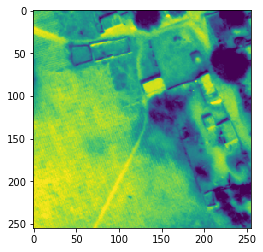

In [153]:
I = plt.imread('6030_4_1_gray.png')
row_ind = 980
col_ind = 2540
I1 = I[row_ind:row_ind+255, col_ind:col_ind+255]

plt.imshow(I1)

## 2-Dimensional Continuous Wavelet Transform

In [154]:
def cwt_2d(I, scale):
    N = I.shape[0]
    
    H = np.zeros([N,N])
    V = np.zeros([N,N])
    
    wavelet, t = gaus1(N,1,scale)
    
    for i in range(N):
        H[i,:] = signal.fftconvolve(I[i,:], wavelet, 'same')
    for i in range(N):
        V[:,i] = signal.fftconvolve(I[:,i], wavelet, 'same')
    return H, V

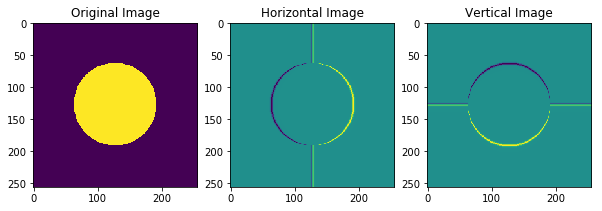

In [155]:
H0, V0 = cwt_2d(C, 0.05)
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=[10,6])
ax0.imshow(C)
ax0.set_title('Original Image')
ax1.imshow(H0)
ax1.set_title('Horizontal Image')
ax2.imshow(V0)
ax2.set_title('Vertical Image')

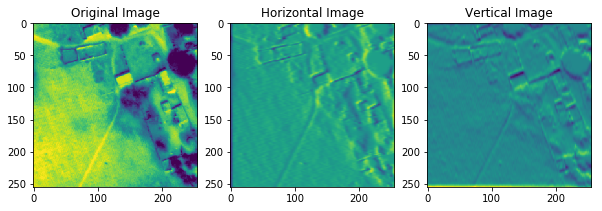

In [156]:
H1, V1 = cwt_2d(I1, 0.1)
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=[10,6])
ax0.imshow(I1)
ax0.set_title('Original Image')
ax1.imshow(H1)
ax1.set_title('Horizontal Image')
ax2.imshow(V1)
ax2.set_title('Vertical Image')

## Wavelet Transform Modulus Maxima in 2-Dimension

In [157]:
def wtmm_2d(H, V):
    M = np.sqrt(H**2 + V**2)
    N = M.shape[1]
    
    A = V / H
    A = np.arctan(A)
    ind = np.where(H<0)
    
    ind1 = np.tan(22.5/180*np.pi)
    ind2 = np.tan(67.5/180*np.pi)
    
    MM = np.zeros([N,N])
    
    for i in range(1,N-2):
        for j in range(1,N-2):
            p = M[i,j]
            p1 = []; p2 = []
            if np.abs(A[i,j]) >= ind2:
                p1 = M[i+1,j]; p2 = M[i-1,j]
                if (p-p1)*(p-p2) >= 0:
                    MM[i,j] = p;
            elif np.abs(A[i,j]) <= ind1:
                p1 = M[i,j+1]; p2 = M[i,j-1]
                if (p-p1)*(p-p2) >= 0:
                    MM[i,j] = p;
            elif (A[i,j]>ind1) & (A[i,j]<ind2):
                p1 = M[i+1,j+1]; p2 = M[i-1,j-1]
                if (p-p1)*(p-p2) >= 0:
                    MM[i,j] = p;
            elif (A[i,j]>=-ind2) & (A[i,j]<=-ind1):
                p1 = M[i+1,j-1]; p2 = M[i-1,j+1]
                if (p-p1)*(p-p2) >= 0:
                    MM[i,j] = p;
    A[ind] = A[ind] + np.pi
    return M, A, MM

/Users/lida/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide


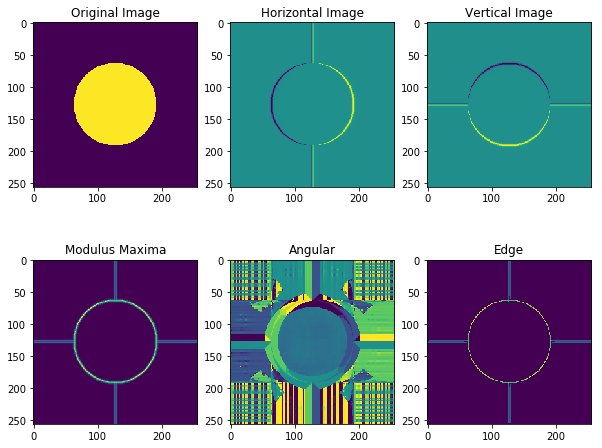

In [158]:
M0, A0, MM0 = wtmm_2d(H0, V0)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=[10,8])
axes[0,0].imshow(C)
axes[0,0].set_title('Original Image')
axes[0,1].imshow(H0)
axes[0,1].set_title('Horizontal Image')
axes[0,2].imshow(V0)
axes[0,2].set_title('Vertical Image')
axes[1,0].imshow(M0)
axes[1,0].set_title('Modulus Maxima')
axes[1,1].imshow(A0)
axes[1,1].set_title('Angular')
axes[1,2].imshow(MM0)
axes[1,2].set_title('Edge')

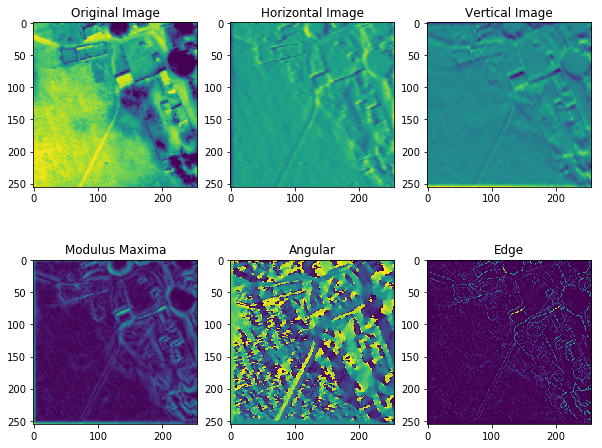

In [159]:
M1, A1, MM1 = wtmm_2d(H1, V1)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=[10,8])
axes[0,0].imshow(I1)
axes[0,0].set_title('Original Image')
axes[0,1].imshow(H1)
axes[0,1].set_title('Horizontal Image')
axes[0,2].imshow(V1)
axes[0,2].set_title('Vertical Image')
axes[1,0].imshow(M1)
axes[1,0].set_title('Modulus Maxima')
axes[1,1].imshow(A1)
axes[1,1].set_title('Angular')
axes[1,2].imshow(MM1)
axes[1,2].set_title('Edge')

## Edge Detection in Different Scale

In [160]:
scale = np.linspace(0.05,0.5,6)

/Users/lida/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide


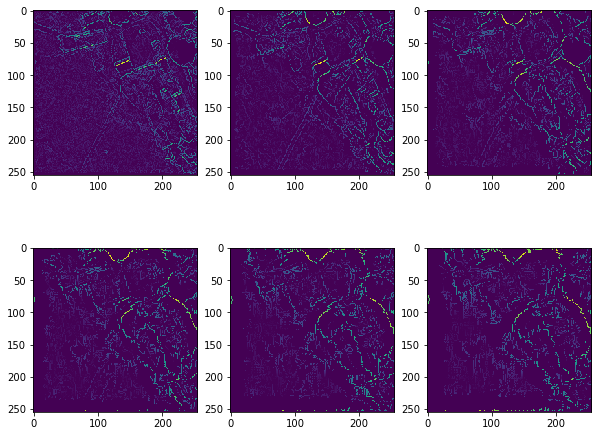

In [161]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=[10,8])
for ax,i in zip(axes.flat, range(len(scale))):
    s = scale[i]
    H, V = cwt_2d(I1, s)
    M, A, MM = wtmm_2d(H, V)
    ax.imshow(MM)